# Machine Learning Checklist

<b>1. Frame the Problem and look at the bigger picture</b>
</br>
Pipelines are codes that take in data on one end and spit it out in a different format on the other end
</br>
<b>2. What type of problem is it??</b>
</br>
First define the number of variables(univariate, bivariate, multivariate), the machine learning paradigm of the problem, type of problem and algorithms to be used. </br>
<b>i. Supervised</b>
</br>
a. Regression - Predicting a value
</br>
b. Classification - Predicting a class
</br>
<b>ii. Unsupervised</b>
</br>
a. Clustering - Group ungrouped data
</br>
b. Association Rule Mining - Find association between 2 or more classes
</br>

<b>Reinforcement</b>
</br>
Select a performance measure

</br>
Mean Absolute Error
</br>
Mean Squared Error
</br>
Root Mean Squared Error
</br>
R2
</br>
Root Mean Squared Log Error
</br>
Mean Absolute Percentage Error

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
pwd = os.getcwd()
filePath = os.path.join(pwd, 'housing.csv')
filePath

'D:\\Projects\\Pytho Data Analysis\\hands_on_ML\\housing.csv'

In [3]:
df = pd.read_csv('housing.csv')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

# Exploring The Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [6]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:>

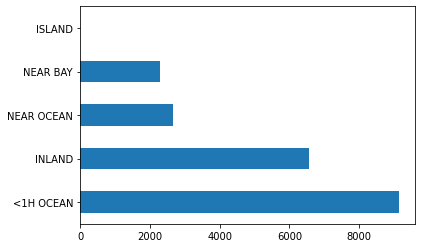

In [7]:
df['ocean_proximity'].value_counts().plot(kind = 'barh')

In [8]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

<AxesSubplot:>

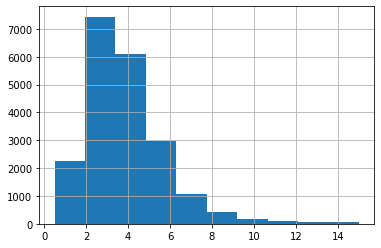

In [9]:
df['median_income'].hist()

In [10]:
df['income_categ'] = pd.cut(df['median_income'],
                            bins = [0.,1.5,3.,4.5,6.,np.inf],
                            labels = [1,2,3,4,5])
df['income_categ'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_categ, dtype: int64

<AxesSubplot:>

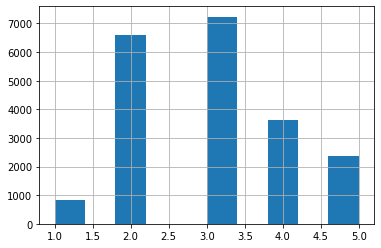

In [11]:
df['income_categ'].hist()

In [12]:
y = df['median_house_value']
X = df.drop('median_house_value', axis = 1)
X

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income ocean_proximity income_categ  
0           322.0       126.0         8.3252        NEAR BAY            5  
1          2401.0      1138.0         8.3014        NEAR BAY            5  
2           496.0       177.0         7.2574        NEAR BAY            5  
3           558.0       219.0         5.6431        NEAR BAY            4  
4           565.0       259.0         3.8462        NEAR BAY            3  
...           ...         ...            ...             ...          ...  
20635       845.0       330.0         1.5603          INLAND            2  
20636       356.0       114.0         2.5568          INLAND            2  
20637      1007.0       433.0         1.7000          INLAND            2  
20638       741.0       349.0         1.8672          INLAND            2  
20639      1387.0       530.0         2.3886          INLAND            2  

[20640 rows x 10 columns]

# Split Dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.33)
X_train

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5047     -118.36     34.01                33.0       3140.0           466.0   
12743    -121.36     38.63                30.0       2619.0           370.0   
9271     -122.62     38.15                14.0       2259.0           341.0   
2421     -119.45     36.58                18.0       1425.0           280.0   
4346     -118.36     34.12                26.0       3902.0           610.0   
...          ...       ...                 ...          ...             ...   
9929     -122.32     38.29                21.0       1607.0           356.0   
7102     -118.00     33.89                35.0       1065.0           176.0   
10138    -117.90     33.91                36.0       1376.0           257.0   
12396    -116.29     33.67                12.0       5048.0           842.0   
10945    -117.88     33.74                19.0       2261.0           642.0   

       population  households  median_income ocean_proximity income_categ  
5047       1214.0       464.0         6.5044       <1H OCEAN            5  
12743       940.0       359.0         4.7283          INLAND            4  
9271       1127.0       346.0         6.4092       <1H OCEAN            5  
2421        753.0       266.0         3.7813          INLAND            3  
4346       1468.0       632.0         8.5136       <1H OCEAN            5  
...           ...         ...            ...             ...          ...  
9929        834.0       352.0         2.3787        NEAR BAY            2  
7102        574.0       171.0         5.0384       <1H OCEAN            4  
10138       687.0       221.0         3.5403       <1H OCEAN            3  
12396       883.0       391.0         5.6918          INLAND            4  
10945      3545.0       635.0         2.5224       <1H OCEAN            2  

[13828 rows x 10 columns]

<AxesSubplot:>

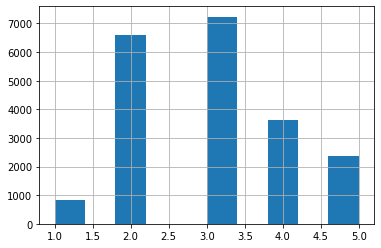

In [14]:
df['income_categ'].hist()

<AxesSubplot:>

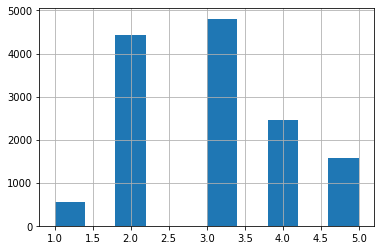

In [15]:
X_train['income_categ'].hist()

# Stratified  Split

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(df, df['income_categ']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [17]:
strat_test_set['income_categ'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_categ, dtype: float64

In [18]:
df['income_categ'].value_counts()/len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_categ, dtype: float64

In [19]:
strat_train_set.drop('income_categ', axis = 'columns', inplace=True)
strat_test_set.drop('income_categ', axis = 'columns', inplace=True)

# Visuals

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
housing = strat_train_set.copy()

In [22]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  median_house_value  \
12655      2237.0       706.0         2.1736             72100.0   
15502      2015.0       768.0         6.3373            279600.0   
2908        667.0       300.0         2.8750             82700.0   
14053       898.0       483.0         2.2264            112500.0   
20496      1837.0       580.0         4.4964            238300.0   

      ocean_proximity  
12655          INLAND  
15502      NEAR OCEAN  
2908           INLAND  
14053      NEAR OCEAN  
20496       <1H OCEAN

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

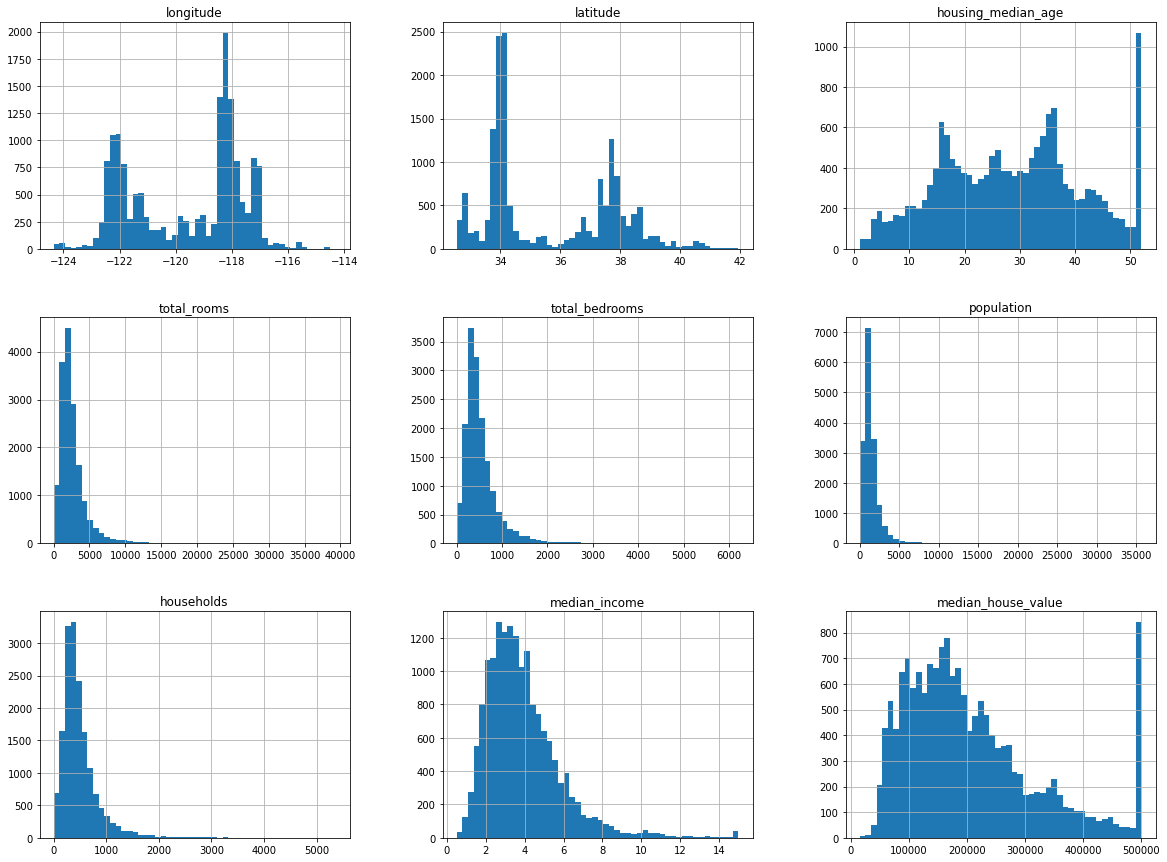

In [23]:
housing.hist(bins = 50, figsize=(20,15))

<AxesSubplot:>

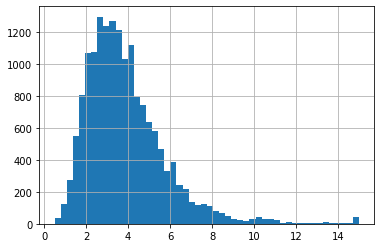

In [24]:
housing['median_income'].hist(bins = 50)

# Geographic Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

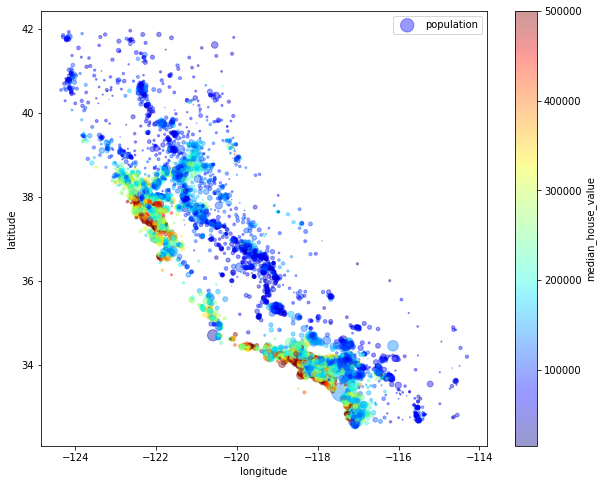

In [25]:
housing.plot(kind = 'scatter', x = 'longitude',y = 'latitude', alpha = 0.4,
            s = housing['population']/100, label = 'population', figsize=(10,8),
            c = 'median_house_value',cmap = plt.get_cmap('jet'), colorbar = True,
            sharex = False)

<b>Correlation Matrices<b/>

In [26]:
housing.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105823     0.048909   
latitude            -0.924478  1.000000            0.005737    -0.039245   
housing_median_age  -0.105823  0.005737            1.000000    -0.364535   
total_rooms          0.048909 -0.039245           -0.364535     1.000000   
total_bedrooms       0.076686 -0.072550           -0.325101     0.929391   
population           0.108071 -0.115290           -0.298737     0.855103   
households           0.063146 -0.077765           -0.306473     0.918396   
median_income       -0.019615 -0.075146           -0.111315     0.200133   
median_house_value  -0.047466 -0.142673            0.114146     0.135140   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076686    0.108071    0.063146      -0.019615   
latitude                 -0.072550   -0.115290   -0.077765      -0.075146   
housing_median_age       -0.325101   -0.298737   -0.306473      -0.111315   
total_rooms               0.929391    0.855103    0.918396       0.200133   
total_bedrooms            1.000000    0.876324    0.980167      -0.009643   
population                0.876324    1.000000    0.904639       0.002421   
households                0.980167    0.904639    1.000000       0.010869   
median_income            -0.009643    0.002421    0.010869       1.000000   
median_house_value        0.047781   -0.026882    0.064590       0.687151   

                    median_house_value  
longitude                    -0.047466  
latitude                     -0.142673  
housing_median_age            0.114146  
total_rooms                   0.135140  
total_bedrooms                0.047781  
population                   -0.026882  
households                    0.064590  
median_income                 0.687151  
median_house_value            1.000000

<AxesSubplot:>

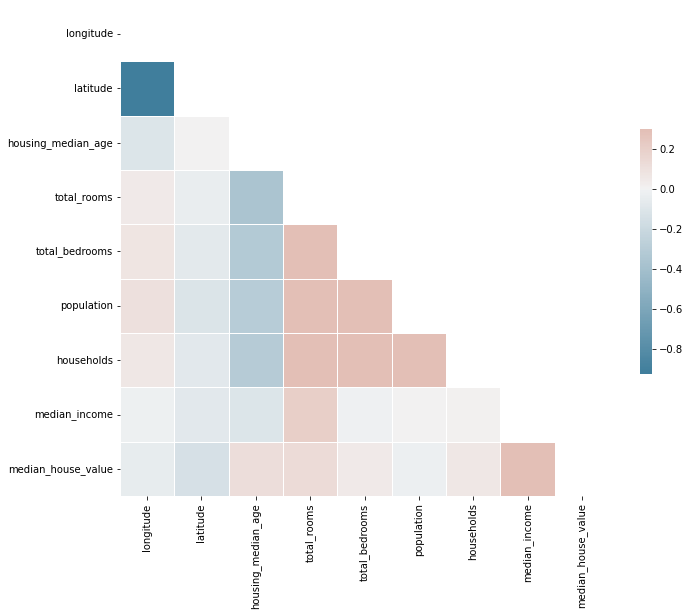

In [27]:
corr = housing.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize = (11,9))
cmap = sns.diverging_palette(230,20, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 0.3, center = 0,
           square = True, linewidths = 0.5, cbar_kws = {'shrink': 0.5})

# Preparing Data For Machine Learning

In [28]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [29]:
sample_incomplete_rows = housing[housing.isnull().any(axis = 1)]
sample_incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1606     -122.08     37.88                26.0       2947.0             NaN   
10915    -117.87     33.73                45.0       2264.0             NaN   
19150    -122.70     38.35                14.0       2313.0             NaN   
4186     -118.23     34.13                48.0       1308.0             NaN   
16885    -122.40     37.58                26.0       3281.0             NaN   
...          ...       ...                 ...          ...             ...   
1350     -121.95     38.03                 5.0       5526.0             NaN   
4691     -118.37     34.07                50.0       2519.0             NaN   
9149     -118.50     34.46                17.0      10267.0             NaN   
16757    -122.48     37.70                33.0       4492.0             NaN   
13336    -117.67     34.04                13.0       1543.0             NaN   

       population  households  median_income ocean_proximity  
1606        825.0       626.0         2.9330        NEAR BAY  
10915      1970.0       499.0         3.4193       <1H OCEAN  
19150       954.0       397.0         3.7813       <1H OCEAN  
4186        835.0       294.0         4.2891       <1H OCEAN  
16885      1145.0       480.0         6.3580      NEAR OCEAN  
...           ...         ...            ...             ...  
1350       3207.0      1012.0         4.0767          INLAND  
4691       1117.0       516.0         4.3667       <1H OCEAN  
9149       4956.0      1483.0         5.5061       <1H OCEAN  
16757      3477.0      1537.0         3.0546      NEAR OCEAN  
13336       776.0       358.0         3.0598          INLAND  

[158 rows x 9 columns]

In [30]:
median = housing['total_bedrooms'].median()
sample_incomplete_rows['total_bedrooms'].fillna(median, inplace = True)
sample_incomplete_rows

C:\Users\Daniel Okia\AppData\Local\Temp\ipykernel_2732\3721845812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_incomplete_rows['total_bedrooms'].fillna(median, inplace = True)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1606     -122.08     37.88                26.0       2947.0           433.0   
10915    -117.87     33.73                45.0       2264.0           433.0   
19150    -122.70     38.35                14.0       2313.0           433.0   
4186     -118.23     34.13                48.0       1308.0           433.0   
16885    -122.40     37.58                26.0       3281.0           433.0   
...          ...       ...                 ...          ...             ...   
1350     -121.95     38.03                 5.0       5526.0           433.0   
4691     -118.37     34.07                50.0       2519.0           433.0   
9149     -118.50     34.46                17.0      10267.0           433.0   
16757    -122.48     37.70                33.0       4492.0           433.0   
13336    -117.67     34.04                13.0       1543.0           433.0   

       population  households  median_income ocean_proximity  
1606        825.0       626.0         2.9330        NEAR BAY  
10915      1970.0       499.0         3.4193       <1H OCEAN  
19150       954.0       397.0         3.7813       <1H OCEAN  
4186        835.0       294.0         4.2891       <1H OCEAN  
16885      1145.0       480.0         6.3580      NEAR OCEAN  
...           ...         ...            ...             ...  
1350       3207.0      1012.0         4.0767          INLAND  
4691       1117.0       516.0         4.3667       <1H OCEAN  
9149       4956.0      1483.0         5.5061       <1H OCEAN  
16757      3477.0      1537.0         3.0546      NEAR OCEAN  
13336       776.0       358.0         3.0598          INLAND  

[158 rows x 9 columns]

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

In [32]:
housing_num = housing.select_dtypes(include = [np.number])
housing_num 

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  
12655      2237.0       706.0         2.1736  
15502      2015.0       768.0         6.3373  
2908        667.0       300.0         2.8750  
14053       898.0       483.0         2.2264  
20496      1837.0       580.0         4.4964  
...           ...         ...            ...  
15174      2026.0      1001.0         5.0900  
12661      4769.0      1418.0         2.8139  
19263       458.0       172.0         3.1797  
19140      1208.0       501.0         4.1964  
19773       625.0       197.0         3.1319  

[16512 rows x 8 columns]

In [33]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [34]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = housing_num.index)
housing_tr 

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  
12655      2237.0       706.0         2.1736  
15502      2015.0       768.0         6.3373  
2908        667.0       300.0         2.8750  
14053       898.0       483.0         2.2264  
20496      1837.0       580.0         4.4964  
...           ...         ...            ...  
15174      2026.0      1001.0         5.0900  
12661      4769.0      1418.0         2.8139  
19263       458.0       172.0         3.1797  
19140      1208.0       501.0         4.1964  
19773       625.0       197.0         3.1319  

[16512 rows x 8 columns]

# Encode Categorical Variables

In [35]:
housing_categ = housing['ocean_proximity']
housing_categ.head(10)

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
1481       NEAR BAY
18125     <1H OCEAN
5830      <1H OCEAN
17989     <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object